<a href="https://colab.research.google.com/github/MohsenJadidi/ISLR/blob/master/Assignment2/Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 2 - Q4 (Discriminant Analysis)**
Statistical Learning Theory Course - Fall 2020 @ AUT

Author: MohammadMohsen Jadidi | email : mohsenjadidi@aut.ac.ir

In [1]:
import os
import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/MohsenJadidi/ISLR/master/Assignment2/vowel_train.txt', 'vowel_train.txt')
urllib.request.urlretrieve('https://raw.githubusercontent.com/MohsenJadidi/ISLR/master/Assignment2/vowel_test.txt', 'vowel_test.txt')

('vowel_test.txt', <http.client.HTTPMessage at 0x7f417ee1a128>)

## Read Data set

In [2]:
import numpy as np

# Train Data set
f = open('vowel_train.txt', 'r')
DataFile = f.readlines()

DataList = []
for i in range(len(DataFile)-1):
    List = DataFile[i+1][0:].split(',')
    tempList = [float(i) for i in List]
    DataList.append(tempList)
  
Data = np.array(DataList)    
X_train = Data[:,2:]
Y_train = Data[:,1]

del List,  DataList, tempList, Data

# Test Data set
f = open('vowel_test.txt', 'r')
DataFile = f.readlines()

DataList = []
for i in range(len(DataFile)-1):
    List = DataFile[i+1][0:].split(',')
    tempList = [float(i) for i in List]
    DataList.append(tempList)
  
Data = np.array(DataList)    
X_test = Data[:,2:]
Y_test = Data[:,1]

del List,  DataList, tempList, Data

## Linear Discriminant Analysis

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

classifier = LinearDiscriminantAnalysis(solver='svd')
classifier.fit(X_train, Y_train)

accuracyTrain = classifier.score(X_train, Y_train)
accuracyTest = classifier.score(X_test, Y_test)
print('LDA accuracy :\n Train set :', accuracyTrain, '| Test set :',accuracyTest)

LDA accuracy :
 Train set : 0.6837121212121212 | Test set : 0.44372294372294374


## Quadratic Discriminant Analysis

QDA accuracy :
 Train set : 0.9886363636363636 | Test set : 0.47186147186147187
(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]), array([ 66,  46,  16,  20,  32,  50,  81,   7, 101,  12,  31]))
              precision    recall  f1-score   support

         1.0      0.561     0.881     0.685        42
         2.0      0.478     0.524     0.500        42
         3.0      0.750     0.286     0.414        42
         4.0      0.600     0.286     0.387        42
         5.0      0.500     0.381     0.432        42
         6.0      0.440     0.524     0.478        42
         7.0      0.272     0.524     0.358        42
         8.0      0.857     0.143     0.245        42
         9.0      0.376     0.905     0.531        42
        10.0      0.917     0.262     0.407        42
        11.0      0.645     0.476     0.548        42

    accuracy                          0.472       462
   macro avg      0.581     0.472     0.453       462
weighted avg      0.581     0.472

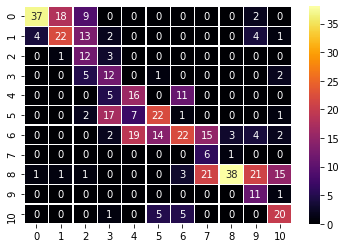

In [4]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn


classifier = QuadraticDiscriminantAnalysis()
classifier.fit(X_train, Y_train)

accuracyTrain = classifier.score(X_train, Y_train)
accuracyTest = classifier.score(X_test, Y_test)
print('QDA accuracy :\n Train set :', accuracyTrain, '| Test set :',accuracyTest)

Y_pred=classifier.predict(X_test)
print(np.unique(Y_pred, return_counts=True))
confusionMatrix = confusion_matrix(Y_pred, Y_test)
sn.heatmap(confusionMatrix, cmap='inferno', annot=True, linewidths=.25)
print(classification_report(Y_test, Y_pred, digits=3))